In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import OrderedDict
import itertools

# Parameters

In [2]:
GRAPH_NUMBER = 10000
MAX_NODE_NUMBER = 50
MIN_NODE_NUMBER = 7
LIMIT_MIN_NODE_NUMBER = 50
LIMIT_MAX_NODE_NUMBER = 100

# Functions

### Optimally Connected

In [3]:
def is_optimally_connected(graph):
    # these try except are for situation that graph is disconnected
    kappa = 0
    try:
        kappa = nx.minimum_node_cut(graph) # node cut number
    except:
        pass
    
    gamma = 0
    try:
        gamma = nx.minimum_edge_cut(graph) # edge cut nomber
    except:
        pass
    degrees = [val for (node, val) in graph.degree()]
    delta = min(degrees)
    return kappa == gamma and gamma == delta

### Automorphism

In [4]:
def mapped_edge_exists(graph, permute, edge):
    u = edge[0]
    v = edge[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)
    
def get_automorphisms(graph):
    # getting all possible permutations
    permutations = list(map(list, itertools.permutations(graph.nodes())))
    
    # if we don't accept automorphism to itself it should be uncommented
    # permutations.remove(list(graph.nodes()))
    
    automorphisms = []
    edges = list(graph.edges())
    for permute in permutations:
        if all([mapped_edge_exists(graph, permute, edge) for edge in edges]):
            automorphisms.append(permute)
    
    return automorphisms

### Node-Similarity

In [5]:
def is_node_similar(graph, automorphisms):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    for node_set in node_sets:
        if not any([automorphism.index(node_set[0]) == node_set[1] for automorphism in automorphisms]):
            return False
    
    return True

### Node-Similarity and Symmetry (Manual Permutation)

In [6]:
def permute_has_node_similarity_condition(graph, node_set, permute):
    u = node_set[0]
    v = node_set[1]
    mapped_u = permute.index(u)
    mapped_v = permute.index(v)
    return graph.has_edge(mapped_u, mapped_v)

def update_node_sets(graph, node_sets, curr):
    for node_set in node_sets:
            if permute_has_node_similarity_condition(graph, node_set, curr):
                node_sets.remove(node_set)


# recursive permute function
def permute(graph, node_sets, curr, remain):
    if len(remain) == 0: # having complete permutation
        # print(f'node_sets len: {len(node_sets)}')
        update_node_sets(graph, node_sets, curr)
    
    remain_copy = remain.copy()
    for i in remain:
        if len(node_sets):
            return
        
        curr.append(i)
        remain_copy.remove(i)
        permute(graph, node_sets, curr, remain_copy)
        remain_copy.append(i)
        curr.remove(i)

def is_node_similar_manual_permutation(graph):
    node_sets = list(itertools.permutations(graph.nodes(), 2))
    
    permute(graph, node_sets, [], list(graph.nodes()))
    is_node_similar = len(node_sets) == 0
    
    return is_node_similar

# Plot Functions

In [7]:
def draw_plot(graphs_dic, draw_simple=True, draw_linear_regression=True):
    x_axis = list(graphs_dic.keys())
    y_axis = []
    for same_node_number_graphs in graphs_dic.values():
        oc_number = sum([is_optimally_connected(graph) for graph in same_node_number_graphs])
        oc_probability = oc_number / len(same_node_number_graphs)
        y_axis.append(oc_probability * 100)
    
    if draw_simple:
        print('simple plot:')
        simple_plot(x_axis, y_axis)
    
    if draw_linear_regression:
        print('Linear regression plot:')
        linear_regression_plot(x_axis, y_axis)

### Simple Plot

In [8]:
def simple_plot(x_axis, y_axis):
    plt.ylabel('oc probability percent')
    plt.xlabel('node number')
    plt.title('probability for er graph to be oc')
    plt.plot(x_axis, y_axis, '-o')
    plt.show()

### Linear Regression

In [9]:
def linear_regression_plot(x_axis, y_axis):
    # linear regression
    coef = np.polyfit(x_axis, y_axis, 1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y
    
    plt.plot(x_axis, y_axis, 'yo', x_axis, poly1d_fn(x_axis), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
    plt.ylabel('oc probability percent')
    plt.xlabel('node number')
    plt.title('probability for er graph to be oc')
    plt.show()

# Making Graph

In [10]:
graphs_dic = {}
seeds = random.sample(range(1, 10000000), GRAPH_NUMBER)
for i in range(GRAPH_NUMBER):
    node_number = random.randint(MIN_NODE_NUMBER, MAX_NODE_NUMBER)
    # Hard Way :)
    # max_edge_number = ((node_number) * (node_number - 1)) / 2
    # sqrt = math.sqrt(node_number)
    # edge_number = ((sqrt) * (node_number)) / 2
    # edge_probability = edge_number / max_edge_number
    edge_probability = math.sqrt(node_number) / (node_number - 1)
    
    graph = nx.erdos_renyi_graph(node_number, edge_probability, seed=seeds[i])
    
    if node_number not in graphs_dic.keys():
        graphs_dic[node_number] = [graph]
    else:
        graphs_dic[node_number].append(graph)
        
graphs_dic = OrderedDict(sorted(graphs_dic.items()))

simple plot:


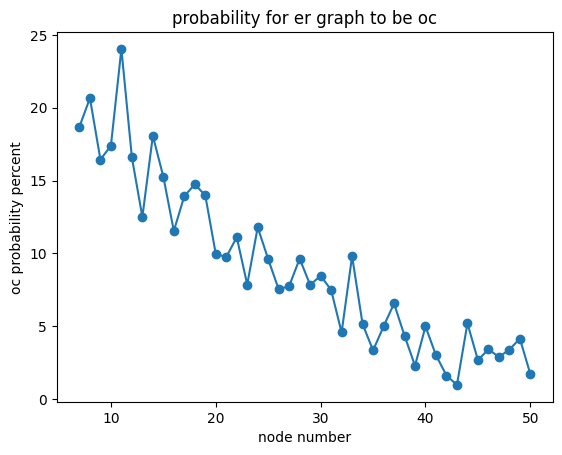

Linear regression plot:


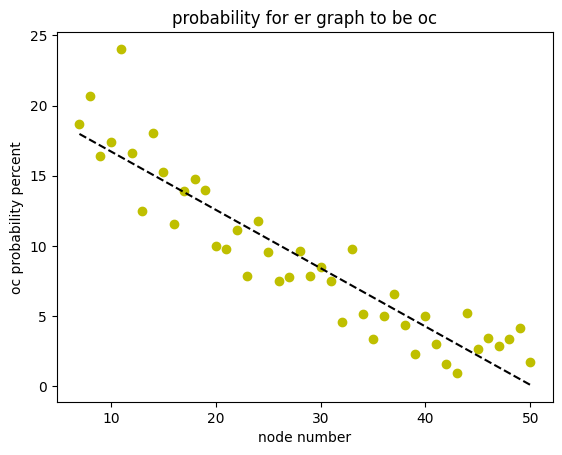

In [11]:
draw_plot(graphs_dic)

# Making Graphs

In [12]:
graphs = []
seeds = random.sample(range(1, 10000000), GRAPH_NUMBER)
for i in range(GRAPH_NUMBER):
    node_number = random.randint(LIMIT_MIN_NODE_NUMBER, LIMIT_MAX_NODE_NUMBER)
    # Hard Way :)
    # max_edge_number = ((node_number) * (node_number - 1)) / 2
    # sqrt = math.sqrt(node_number)
    # edge_number = ((sqrt) * (node_number)) / 2
    # edge_probability = edge_number / max_edge_number
    edge_probability = math.sqrt(node_number) / (node_number - 1)
    
    graph = nx.erdos_renyi_graph(node_number, edge_probability, seed=seeds[i])
    
    graphs.append(graph)

In [13]:
# due to large amount of node number, we can't run this code

is_ns = []
for graph in graphs:
    is_ns.append(is_node_similar_manual_permutation(graph))

is_ns_no = sum(is_ns)
not_ns_no = len(is_ns) - is_ns_no
print('number of optimally connected: ', is_ns_no)
print('number of not optimally connected: ', not_ns_no)
print(is_ns)

number of optimally connected:  0
number of not optimally connected:  10000
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,